# Fundamentals module Project

Solutions for the project assessment for Fundamentals of Data Analysis. Author is Noel Manley (G00387903@hotmail.com).

## Instructions

In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. 
To enhance your submission, you might consider comparing simple linear regression toother types of regression on this data set.

## Solution
***

### Introduction

Harvesting wind energy has been a concern for man for many centuries. It is has become increasingly important over the last number of decades as a source of energy due to the declining stocks of fossil fuels. It is also a more environmentally friendly source of energy as it does not significantly damage our environment when compared with fossil fuels [1]. It is predicted that wind and solar capacity will double over the next five years globally and exceed that of both gas and coal [2].

Wind turbines have to compete with other sources of energy. Characteristics such as wind turbine power versus wind speed must be optimized to be cost effective in order to compete with these other sources of energy and provide investors with a return on their investment. The data in the powerproduction dataset gives an indication of the what wind speed is required to get maximum power from a wind turbine

#### Import powerproduction dataset

In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# import dataset from githib repository
df = pd.read_csv("powerproduction.txt")
# show first 10 records of the dataset
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


### Analysis of the powerproduction dataset

The powerproduction dataset consists of 500 records and two variables (speed & power). The plot of the dataset below shows the relationship between the wind speed and power outage variables is similar to an S-shape curve [3]. At a low wind speed (below 8mph) there is very little power production from the turbine. From a wind speed of 10 mph upwards power production increases substantially from approximatially 20 watts at 10mph to 80 watts at 15mph before levelling off at a wind speed of 20mph which produces 100 watts of energy. The power production then goes down slightly and abruptly goes back to zero at a wind speed of 24mph which would suggest that is the cut-off point of the wind turbine. In general the correlation between the two variables is the highre the wind speed the greater the power output of the wind turbine up to a wind speed of 24 mph when the turbine cuts out to protect itself from excessive wind.

There are a number of records which don't conform to the overall trend in the dataset. These four data points indicate that are those wind speed in the data which produce zero output which may be due to an outage in the turbine. There are also some data points at the end of the power variable which suggests the turbine cuts out above a certain wind speed to perhaps protect itself from damage caused by excessive winds. Because of this the dataset doesn't fit a straight line linear regression that well and may be more appropriate for a curved line regression.

### Python code

In python the linear regression of a plot between two variables is created by the polyfit function from the numpy library. The power production dataset is imported featuring the speed and power variables. The speed is the wind speed and the power variable shows the power output at that particular wind speed. The input values of speed and the output values of power are assigned to x and y variables. A scatter plot can be created to display the relationship between the two variables. A line is fitted to the plot using the polyfit function using np.polyfit(x, y, 1) equation where the 1 defines the degree of polynomial that is required for the fit.

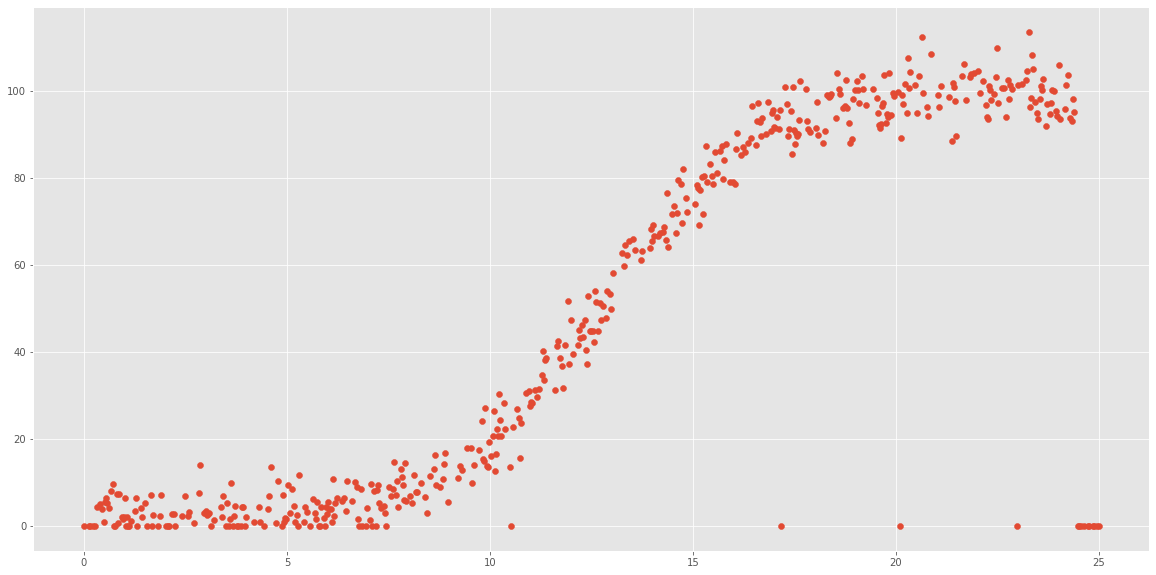

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# make plot tidier
plt.style.use("ggplot")
# make plot bigger
plt.rcParams["figure.figsize"] = (20,10)

# set x equal to speed variable and y to power variable
x = df.speed
y = df.power

plt.scatter(x, y);

### Explaining Polyfit method

Polyfit determines the fit of the straight line from an existing dataset by the Ordinary Least Squares method (OLS). OLS method functions by taking the input variable, an independent variable, and combines it with other variables known as betas through addition and multiplication. The first beta is known simply as "beta_1" and is used to calculate the slope of the function. The second variable represents the coefficient, or what difference there is between increments in the independent variable [6].

The betas are known as the errors and is the difference between the y value as defined by the line and the real y value from the dataset. For example from the image below we'll take the value of x thats equal to 30 the y value is about 73. But the y value of the regression line for the datapoint is about 58. The difference between the two values (15) is the error value in for that datapoint. So using the ordinary least squares method all the erros between the y values and the linear regression line are calculated. All of these errors are squared and then all the errors are summed. The line is drawn where the sum of the squared errors is the smallest possible value [7].

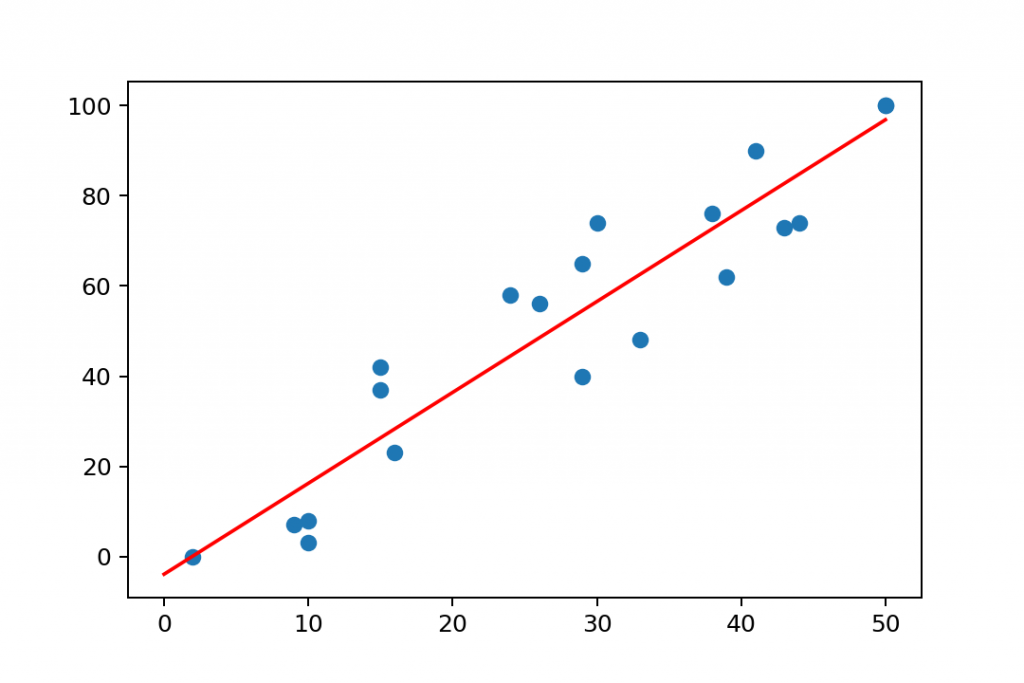

In [3]:
from IPython.display import Image
# impotr an image [7]
Image(filename='linear-regression-fitted-line.png')

#### Plotting the dataset

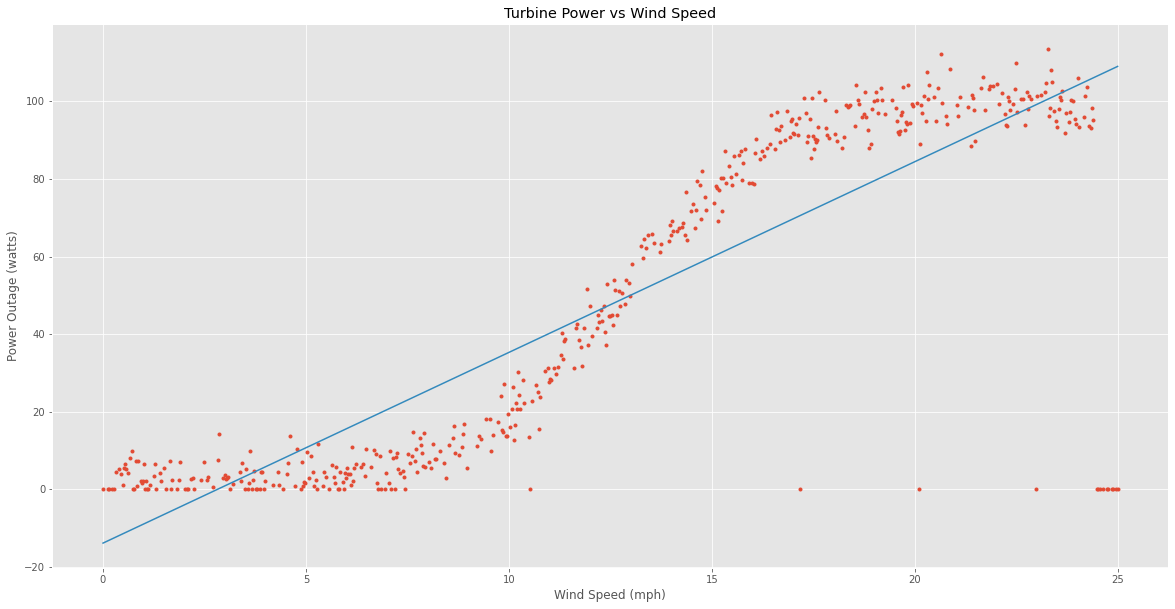

In [15]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# make plot tidier
plt.style.use("ggplot")
# make plot bigger
plt.rcParams["figure.figsize"] = (20,10)

# set x equal to speed variable and y to power variable
x = df.speed
y = df.power


coeffs = np.polyfit(x,y,1)
plt.plot(x, y, '.', label = "Data")
c=plt.plot(x, coeffs[0]*x+coeffs[1], '-', label = "Best fit")
#plt.plot(df["speed"], df["power"], '.', label = "Data")

# add title, xlabel and ylabel to plot
plt.title("Turbine Power vs Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Power Outage (watts)");

The output of the polyfit function is the array below. The m value or the regression coeffient is 4.91759567 and the c value or intercept is -13.89990263. The equation that describes the fitted line is y = 4.91759567 * x + -13.89990263

In [52]:
coeffs

array([  4.91759567, -13.89990263])

### Concepts of Linear Regression

Linear Regression is a machine learning technique that finds the best-fitting striaght line for a set of data between two variables so that the distance between the line and the data points is at a minimum. In this project the linear regression tries to find the best linear relationship between the input (wind speed) and the output (power outage) [4]. 

The linear regression line can be described with the mathematical equation y = mx + c. The goal of linear regression is to find the best values for m and c for the power production data. The variables are defined as follows:
- m defines the slope of the line or in machine learning terminology the regression coefficient.
- c defines the intercept where the plotted line intersects the y-axis. 
- x is the input variable.
- y is the output variable.

Sathwick in his publication [4] conducts a linear regression model example between the variables experience (years) and earning potential (dollars). The relationship as shown below is defined by y = 0.5 * x + 1 where y = earning per year x = experience, 1 is the intercept and 0.5 is the weight of experience. From this example we can view that the data point of a person who has the experience of 8 years predicts that the person would earn around $50k per year. Using the linear regression model on the project dataset a wind speed of 10 mph predicts that the outage produced by the power turbine would be 20 watts. This is very useful information for the operators of the wind turbine farm. If light winds are expected costs can be saved by not processing the wind turbine and employees can be delegated elsewhere. Whereas in stormy weather the turbine can be fully operational and provide near maximum output. 

There are however some unexpected results in the dataset where there are data points that do not fit into the overall trend of the dataset. These data points or outliers could be caused by a forced shutdown of the turbine may be due to a mechanical fault or a software malfunction which is always possible with a complex machinary. These outlier data points can occur in any business case and for that reason must be included in the dataset to display realtimne data. For instance if as turbine has a lot of downtime in particular during periods of high wind thus resulting in a lot of power loss resulting in losing money for investors it may be of more benefir to find the root cause of an issue rather than making a short term fix. Analysts would have to factor this possibility of downbtime into any machine learning models.

The linear regression model is never a perfect fit and will never be fully accurate but it is the most accurate way of determining the best fiT line of a dataset.

### References

[1]-Renewables-info.com: Is wind energy environmentally friendly source of energy?; http://www.renewables-info.com/energy_news_and_reports/is_wind_energy_environmentally_friendly_source_of_energy.html?jjj=1609686518280

[2]-Resilience: IEA: Wind and solar capacity will overtake both gas and coal globally by 2024; https://www.resilience.org/stories/2020-11-12/iea-wind-and-solar-capacity-will-overtake-both-gas-and-coal-globally-by-2024/

[3]-windpower.generatorguide: Wind Power Calculator; http://windpower.generatorguide.net/wind-speed-power.html

[4]-towards data science: What is a Linear Regression?; https://towardsdatascience.com/the-concepts-behind-linear-regression-and-its-implementation-ffbab5a4d65e

[5]-data36.com: Linear Regression in Python using numpy + polyfit (with code base); https://data36.com/linear-regression-in-python-numpy-polyfit/is 

[6]-Deep AI: Ordinary Least Squares; https://deepai.org/machine-learning-glossary-and-terms/ordinary-least-squares

[7]-stackoverflow: How can I display an image from a file in Jupyter Notebook?; https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
